<a href="https://colab.research.google.com/github/JacekPardyak/vps/blob/master/VPS_H2O.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
!pip install h2o
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,39 mins 10 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.7
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_unknownUser_nxpizu
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.083 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [68]:
!wget --continue https://raw.githubusercontent.com/JacekPardyak/vps/master/data/vps_churn_data.txt -O /tmp/vps_churn_data.txt
!wget --continue https://raw.githubusercontent.com/JacekPardyak/vps/master/data/vps_test_data.txt -O /tmp/vps_test_data.txt

df = h2o.import_file(path='/tmp/vps_churn_data.txt')
test = h2o.import_file(path='/tmp/vps_test_data.txt')
df.describe()



--2021-09-14 14:07:52--  https://raw.githubusercontent.com/JacekPardyak/vps/master/data/vps_churn_data.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

--2021-09-14 14:07:52--  https://raw.githubusercontent.com/JacekPardyak/vps/master/data/vps_test_data.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse pr

,id,cpu_load_mean_m_3,disk_octets_read_mean_m_3,disk_octets_write_mean_m_3,disk_ops_read_mean_m_3,disk_ops_write_mean_m_3,network_rx_mean_m_3,network_tx_mean_m_3,cpu_load_monthly_mean_delta,network_tx_monthly_mean_delta,network_rx_monthly_mean_delta,disk_ops_read_monthly_mean_delta,disk_ops_write_monthly_mean_delta,disk_octets_write_monthly_mean_delta,disk_octets_read_monthly_mean_delta,cpu_load_max_gradient,disk_octets_read_max_gradient,disk_octets_write_max_gradient,disk_ops_read_max_gradient,disk_ops_write_max_gradient,network_rx_max_gradient,network_tx_max_gradient,is_churn
type,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,int
mins,100.0,0.3488172,0.0,0.0,0.0,0.0,0.0,0.0,-95.38515412,-10.46746121,-56.3485376,-2061.212753,-1688.275473,-9.15267903,-33.50033608,-2.69165098,-1.02459822,-0.28679904,-59.82482337,-50.3657192,-1.58767151,-0.40090297,0.0
mean,241.0,31.532199961484103,6.103057868021201,3.2482532237809187,187.5425116809894,59.653486909116616,2.7290456916961126,4.584761931130743,0.1752353307067137,-0.03133791770318024,-0.051263098303887006,-1.851173437208481,-4.961824043003533,0.11363889653710244,-0.1269000366784452,0.00012459685512367875,0.0022031086572438146,0.0032967075618374553,-0.009785000636042297,-0.14703686579505304,-0.003437448692579505,-0.001027825477031803,0.47703180212014135
maxs,382.0,248.935914,185.3403464,113.3632711,3062.752688,2100.975806,192.0666602,309.0257287,24.67246953,13.87213047,22.03268573,700.8823405,162.8555054,17.10998272,38.59628038,0.8901865,1.74435668,0.54836924,18.8080795,6.42798995,0.68593923,0.67600645,1.0
sigma,81.8392733757251,32.29657998162841,16.044128079008498,8.587143619158267,374.0281681925938,167.21873090248852,14.933229680946994,22.967134356999367,7.991129002256648,1.868966606767961,4.143658023620392,157.03651033205335,109.0815286613374,1.7201972508572718,5.063862099706965,0.24475061547643512,0.16207581336472923,0.05064115594132542,4.789129157892171,3.341701797961705,0.11010137172692981,0.07287264748568904,0.5003569885654794
zeros,0,0,7,4,6,4,1,2,0,2,1,6,4,4,6,0,8,4,6,4,2,2,148
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,100.0,13.37989247,38.82583205,0.11851402,336.6972043,6.77032258,0.01612843,0.01171808,9.93544803,0.001784,-0.00083925,331.6849821,5.18743369,0.09822835,38.59628038,0.44565168,1.74435668,0.00463981,14.46249656,0.22755614,-3.44e-05,5.59e-05,1.0
1,101.0,16.90204301,0.00328473,0.33609133,0.08150538,2.7939785,0.04812798,0.44380426,-3.97190143,-0.1490684,0.00761928,-0.18960574,0.16231183,-0.00070227,-0.01781286,-0.00172695,-0.00059626,-6.43e-05,-0.00633933,-0.00207351,9.5e-05,-0.00434225,0.0
2,102.0,248.935914,19.37152776,31.9710273,213.1603226,194.5582796,1.72831136,1.35480347,9.67491398,-0.1905986,-0.3315117,-22.40323297,-26.08083154,-2.3433956,-0.53592374,0.3733529,-0.01865949,-0.07624555,-0.16357924,-0.44157712,-0.02173184,-0.00538242,0.0


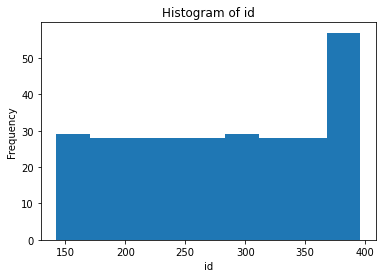

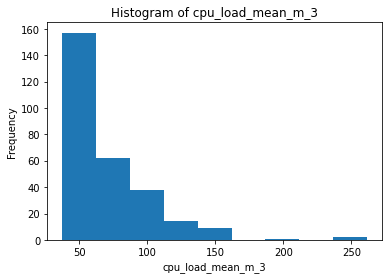

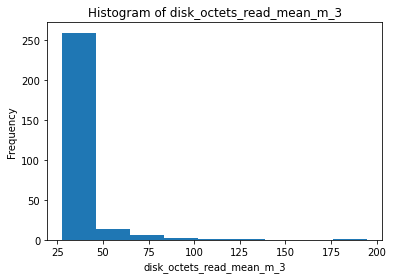

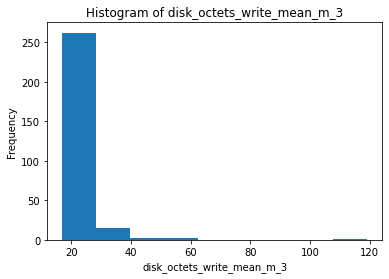

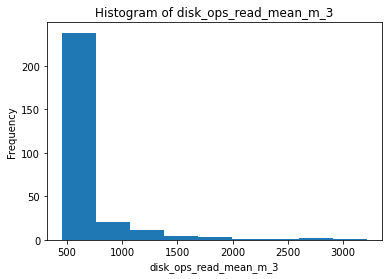

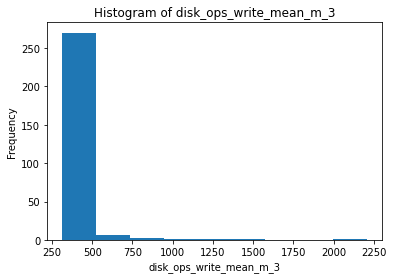

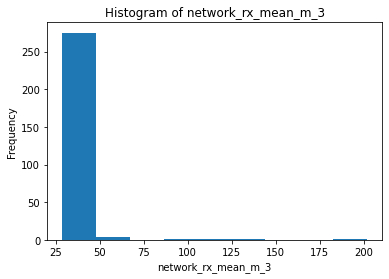

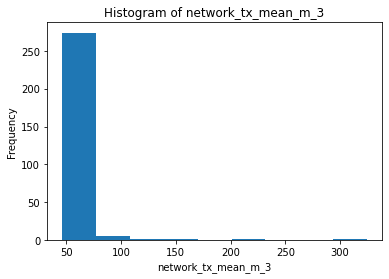

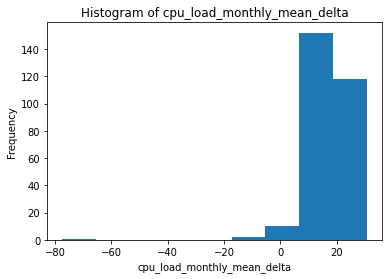

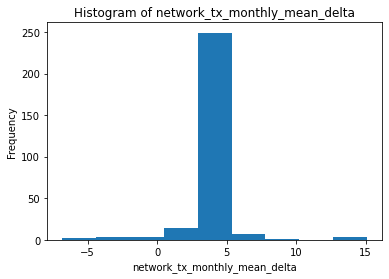

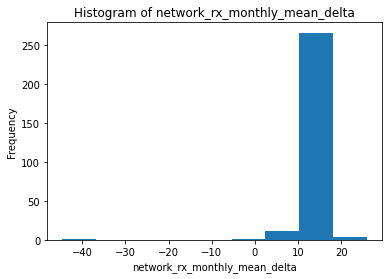

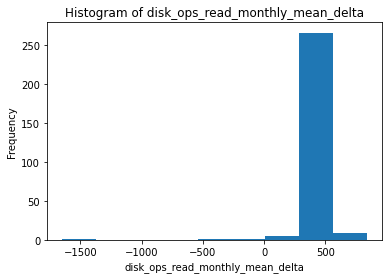

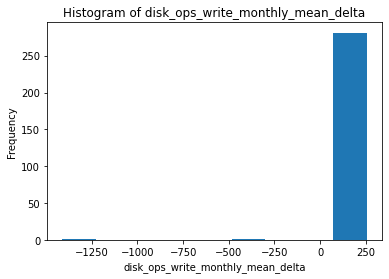

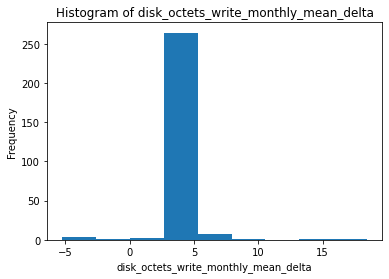

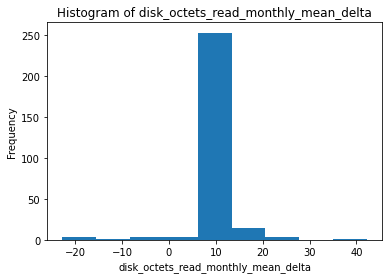

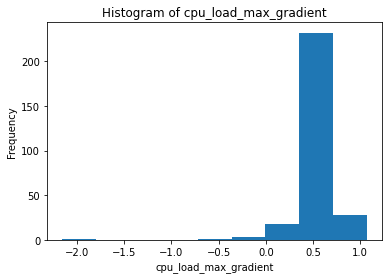

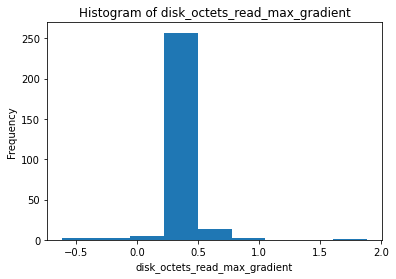

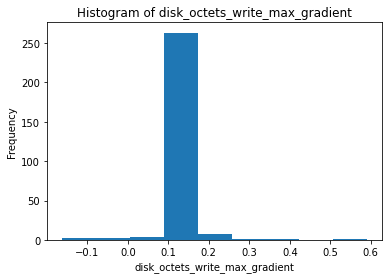

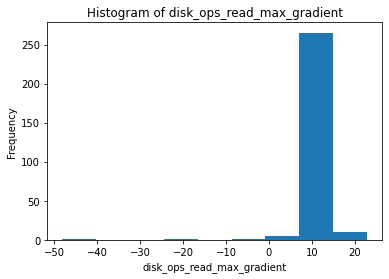

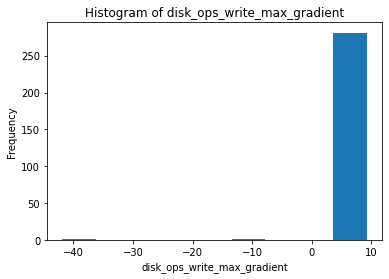

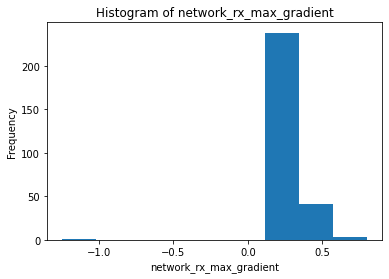

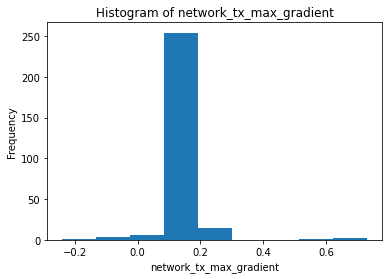

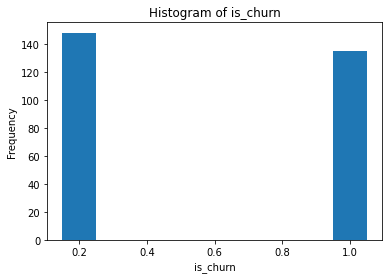

In [42]:
for col in df.columns:
    df[col].hist()

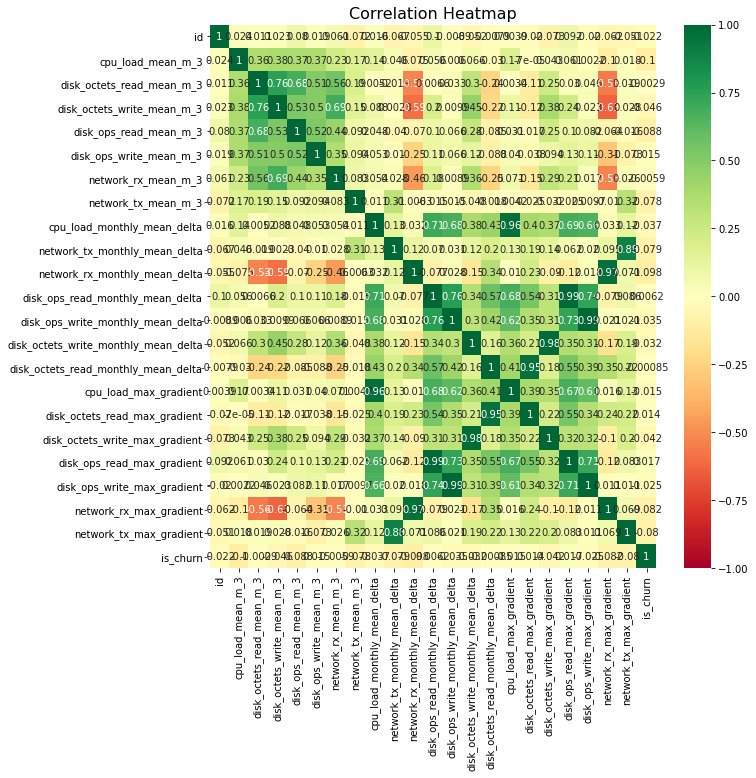

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
corr = df.cor().as_data_frame()
corr.index =  df.columns
sns.heatmap(corr, annot = True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [44]:
# find correlated features
correlated_features = []#set()
corr =  df.cor().as_data_frame()
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.8:
            colname = corr.columns[i]
            correlated_features.append(colname)

# select predictors
predictors = list(set(set(df.columns) - set(correlated_features))  - set(['id', 'is_churn']))


In [45]:
#df["is_churn"] = (df["is_churn"] == 0).ifelse('N', 'Y')
train, valid = df.split_frame(ratios=[0.6], seed=1234)
response = "is_churn"
train[response] = train[response].asfactor()
valid[response] = valid[response].asfactor()
print("Number of rows in train and valid set : ", train.shape[0], valid.shape[0])

Number of rows in train and valid set :  174 109


In [46]:
gbm = H2OGradientBoostingEstimator()
gbm.train(x=predictors, y=response, training_frame=train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [47]:
print(gbm)

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1631625142516_2542


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,9178.0,5.0,5.0,5.0,6.0,15.0,9.98




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.043030800977848296
RMSE: 0.20743866799092278
LogLoss: 0.2084709032545576
Mean Per-Class Error: 0.015957446808510634
AUC: 0.9990691489361702
AUCPR: 0.9989260826856262
Gini: 0.9981382978723403

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.41561103781692904: 


,,0,1,Error,Rate
0,0,91.0,3.0,0.0319,(3.0/94.0)
1,1,0.0,80.0,0.0,(0.0/80.0)
2,Total,91.0,83.0,0.0172,(3.0/174.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.415611,0.981595,82.0
1,max f2,0.415611,0.992556,82.0
2,max f0point5,0.604947,0.992268,76.0
3,max accuracy,0.604947,0.982759,76.0
4,max precision,0.923909,1.000000,0.0
5,max recall,0.415611,1.000000,82.0
6,max specificity,0.923909,1.000000,0.0
7,max absolute_mcc,0.415611,0.965968,82.0
8,max min_per_class_accuracy,0.449115,0.975000,78.0
9,max mean_per_class_accuracy,0.415611,0.984043,82.0



Gains/Lift Table: Avg response rate: 45.98 %, avg score: 46.00 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.011494,0.920840,2.175000,2.175000,1.000000,0.922810,1.000000,0.922810,0.0250,0.0250,117.500000,117.500000,0.025000
1,2,0.022989,0.917548,2.175000,2.175000,1.000000,0.919107,1.000000,0.920959,0.0250,0.0500,117.500000,117.500000,0.050000
2,3,0.034483,0.917110,2.175000,2.175000,1.000000,0.917288,1.000000,0.919735,0.0250,0.0750,117.500000,117.500000,0.075000
3,4,0.040230,0.916683,2.175000,2.175000,1.000000,0.916719,1.000000,0.919304,0.0125,0.0875,117.500000,117.500000,0.087500
4,5,0.051724,0.913851,2.175000,2.175000,1.000000,0.916419,1.000000,0.918663,0.0250,0.1125,117.500000,117.500000,0.112500
5,6,0.103448,0.888288,2.175000,2.175000,1.000000,0.904714,1.000000,0.911689,0.1125,0.2250,117.500000,117.500000,0.225000
6,7,0.149425,0.862051,2.175000,2.175000,1.000000,0.873764,1.000000,0.900019,0.1000,0.3250,117.500000,117.500000,0.325000
7,8,0.201149,0.842324,2.175000,2.175000,1.000000,0.854651,1.000000,0.888353,0.1125,0.4375,117.500000,117.500000,0.437500
8,9,0.298851,0.776525,2.175000,2.175000,1.000000,0.812177,1.000000,0.863450,0.2125,0.6500,117.500000,117.500000,0.650000
9,10,0.402299,0.691499,2.175000,2.175000,1.000000,0.748018,1.000000,0.833767,0.2250,0.8750,117.500000,117.500000,0.875000




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2021-09-14 13:52:34,0.017 sec,0.0,0.498379,0.689907,0.500000,0.459770,1.000,0.540230
1,,2021-09-14 13:52:34,0.037 sec,1.0,0.480683,0.654974,0.844814,0.818943,2.175,0.235632
2,,2021-09-14 13:52:34,0.050 sec,2.0,0.466370,0.627418,0.880452,0.857875,2.175,0.206897
3,,2021-09-14 13:52:34,0.063 sec,3.0,0.452953,0.602201,0.908045,0.886985,2.175,0.155172
4,,2021-09-14 13:52:34,0.075 sec,4.0,0.438635,0.575739,0.922540,0.904396,2.175,0.126437
5,,2021-09-14 13:52:34,0.088 sec,5.0,0.427302,0.555035,0.926995,0.909312,2.175,0.126437
6,,2021-09-14 13:52:34,0.101 sec,6.0,0.418585,0.539427,0.938431,0.922034,2.175,0.120690
7,,2021-09-14 13:52:34,0.113 sec,7.0,0.407000,0.518901,0.951197,0.941137,2.175,0.103448
8,,2021-09-14 13:52:34,0.126 sec,8.0,0.397968,0.502904,0.954588,0.944548,2.175,0.109195
9,,2021-09-14 13:52:34,0.139 sec,9.0,0.391280,0.490994,0.957846,0.950416,2.175,0.103448



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,disk_ops_read_mean_m_3,28.413126,1.000000,0.154348
1,cpu_load_monthly_mean_delta,27.785254,0.977902,0.150937
2,disk_ops_write_mean_m_3,27.259665,0.959404,0.148082
3,disk_octets_read_mean_m_3,14.503483,0.510450,0.078787
4,disk_ops_write_monthly_mean_delta,13.012373,0.457970,0.070687
5,cpu_load_mean_m_3,12.794868,0.450315,0.069505
6,network_tx_mean_m_3,10.353261,0.364383,0.056242
7,network_rx_mean_m_3,10.160913,0.357613,0.055197
8,disk_octets_write_monthly_mean_delta,8.066831,0.283912,0.043821
9,network_rx_monthly_mean_delta,7.969863,0.280499,0.043295


In [48]:
perf = gbm.model_performance(valid)
print(perf)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.31592656695483934
RMSE: 0.5620734533447024
LogLoss: 0.891961868887418
Mean Per-Class Error: 0.44579124579124585
AUC: 0.5175084175084175
AUCPR: 0.5477628434153912
Gini: 0.035016835016834946

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.026665290163476192: 


,,0,1,Error,Rate
0,0,0.0,54.0,1.0,(54.0/54.0)
1,1,0.0,55.0,0.0,(0.0/55.0)
2,Total,0.0,109.0,0.4954,(54.0/109.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.026665,0.670732,108.0
1,max f2,0.026665,0.835866,108.0
2,max f0point5,0.162607,0.571776,88.0
3,max accuracy,0.835509,0.550459,9.0
4,max precision,0.961517,1.000000,0.0
5,max recall,0.026665,1.000000,108.0
6,max specificity,0.961517,1.000000,0.0
7,max absolute_mcc,0.835509,0.187785,9.0
8,max min_per_class_accuracy,0.397602,0.527273,51.0
9,max mean_per_class_accuracy,0.835509,0.554209,9.0



Gains/Lift Table: Avg response rate: 50.46 %, avg score: 41.54 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.018349,0.938512,0.990909,0.990909,0.500000,0.951354,0.500000,0.951354,0.018182,0.018182,-0.909091,-0.909091,-0.000337
1,2,0.027523,0.907414,1.981818,1.321212,1.000000,0.907707,0.666667,0.936805,0.018182,0.036364,98.181818,32.121212,0.017845
2,3,0.036697,0.905237,0.000000,0.990909,0.000000,0.905878,0.500000,0.929073,0.000000,0.036364,-100.000000,-0.909091,-0.000673
3,4,0.045872,0.888921,1.981818,1.189091,1.000000,0.903207,0.600000,0.923900,0.018182,0.054545,98.181818,18.909091,0.017508
4,5,0.055046,0.857996,1.981818,1.321212,1.000000,0.858563,0.666667,0.913010,0.018182,0.072727,98.181818,32.121212,0.035690
5,6,0.100917,0.826780,1.585455,1.441322,0.800000,0.842080,0.727273,0.880769,0.072727,0.145455,58.545455,44.132231,0.089899
6,7,0.155963,0.786738,0.660606,1.165775,0.333333,0.809581,0.588235,0.855644,0.036364,0.181818,-33.939394,16.577540,0.052189
7,8,0.201835,0.658114,0.792727,1.080992,0.400000,0.713873,0.545455,0.823423,0.036364,0.218182,-20.727273,8.099174,0.032997
8,9,0.302752,0.547897,0.720661,0.960882,0.363636,0.611016,0.484848,0.752621,0.072727,0.290909,-27.933884,-3.911846,-0.023906
9,10,0.403670,0.429480,1.261157,1.035950,0.636364,0.469014,0.522727,0.681719,0.127273,0.418182,26.115702,3.595041,0.029293


In [50]:
# tune parameters
gbm_tune = H2OGradientBoostingEstimator(
    ntrees = 3000,
    learn_rate = 0.01,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    col_sample_rate = 0.7,
    sample_rate = 0.7,
    seed = 1234
)      
gbm_tune.train(x=predictors, y=response, training_frame=train, validation_frame=valid)

/usr/local/lib/python3.7/dist-packages/h2o/estimators/estimator_base.py:201: RuntimeWarning: early stopping is enabled but neither score_tree_interval or score_each_iteration are defined. Early stopping will not be reproducible!
  warnings.warn(mesg["message"], RuntimeWarning)


gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [51]:
gbm_tune.model_performance(valid).auc()                 


0.6084175084175084

In [52]:
from h2o.grid.grid_search import H2OGridSearch

gbm_grid = H2OGradientBoostingEstimator(
    ntrees = 3000,
    learn_rate = 0.01,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    col_sample_rate = 0.7,
    sample_rate = 0.7,
    seed = 1234
) 

hyper_params = {'max_depth':[4,6,8,10,12]}
grid = H2OGridSearch(gbm_grid, hyper_params,
                         grid_id='depth_grid',
                         search_criteria={'strategy': "Cartesian"})
#Train grid search
grid.train(x=predictors, 
           y=response,
           training_frame=train,
           validation_frame=valid)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [53]:
print(grid)

    max_depth            model_ids             logloss
0           4   depth_grid_model_1  0.6797092796213028
1           8   depth_grid_model_3   0.681316943287591
2          10   depth_grid_model_4   0.681316943287591
3          12   depth_grid_model_5   0.681316943287591
4           6   depth_grid_model_2  0.6819259180476033
5           4   depth_grid_model_6  0.6819995869103211
6           6   depth_grid_model_7  0.6843591618199321
7          12  depth_grid_model_10  0.6845062638816071
8           8   depth_grid_model_8  0.6845062638816071
9          10   depth_grid_model_9  0.6845062638816071



In [54]:
sorted_grid = grid.get_grid(sort_by='auc',decreasing=True)
print(sorted_grid)

    max_depth            model_ids                 auc
0           4   depth_grid_model_1  0.6280864197530863
1           4   depth_grid_model_6  0.6252525252525253
2           6   depth_grid_model_2   0.617283950617284
3           8   depth_grid_model_3  0.6141975308641975
4          10   depth_grid_model_4  0.6141975308641975
5          12   depth_grid_model_5  0.6141975308641975
6           6   depth_grid_model_7  0.6107744107744109
7          12  depth_grid_model_10  0.6097643097643098
8           8   depth_grid_model_8  0.6097643097643098
9          10   depth_grid_model_9  0.6097643097643098



In [55]:
# Cross validation
cv_gbm = H2OGradientBoostingEstimator(
    ntrees = 3000,
    learn_rate = 0.05,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    nfolds=4, 
    seed=2018)
cv_gbm.train(x = predictors, y = response, training_frame = train, validation_frame=valid)
cv_summary = cv_gbm.cross_validation_metrics_summary().as_data_frame()
cv_summary

/usr/local/lib/python3.7/dist-packages/h2o/estimators/estimator_base.py:201: RuntimeWarning: early stopping is enabled but neither score_tree_interval or score_each_iteration are defined. Early stopping will not be reproducible!
  warnings.warn(mesg["message"], RuntimeWarning)


gbm Model Build progress: |███████████████████████████████████████████████| 100%


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid
0,accuracy,0.49834725,0.087249786,0.46666667,0.42553192,0.625,0.47619048
1,auc,0.5695262,0.04058239,0.5515873,0.5206767,0.60401005,0.60183066
2,err,0.5016527,0.087249786,0.53333336,0.5744681,0.375,0.52380955
3,err_count,22.0,5.0990195,24.0,27.0,15.0,22.0
4,f0point5,0.5366092,0.07137845,0.52238804,0.4679803,0.6369427,0.5191257
5,f1,0.6453963,0.059512388,0.6363636,0.5846154,0.72727275,0.6333333
6,f2,0.81301636,0.02808667,0.81395346,0.77868855,0.84745765,0.8119658
7,lift_top_group,1.0288221,1.1945215,0.0,0.0,1.9047619,2.2105262
8,logloss,0.7653429,0.052797355,0.84310615,0.7345256,0.7303831,0.75335675
9,max_per_class_error,0.9144124,0.119884655,1.0,0.96428573,0.7368421,0.95652175


In [56]:
cv_gbm.model_performance(valid).auc()

0.528956228956229

## **XGBoost**


In [57]:
from h2o.estimators import H2OXGBoostEstimator

cv_xgb = H2OXGBoostEstimator(
    ntrees = 3000,
    learn_rate = 0.05,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    nfolds=4, 
    seed=2018)
cv_xgb.train(x = predictors, y = response, training_frame = train, validation_frame=valid)
cv_xgb.model_performance(valid).auc()

/usr/local/lib/python3.7/dist-packages/h2o/estimators/estimator_base.py:201: RuntimeWarning: early stopping is enabled but neither score_tree_interval or score_each_iteration are defined. Early stopping will not be reproducible!
  warnings.warn(mesg["message"], RuntimeWarning)


xgboost Model Build progress: |███████████████████████████████████████████| 100%


0.5993265993265994

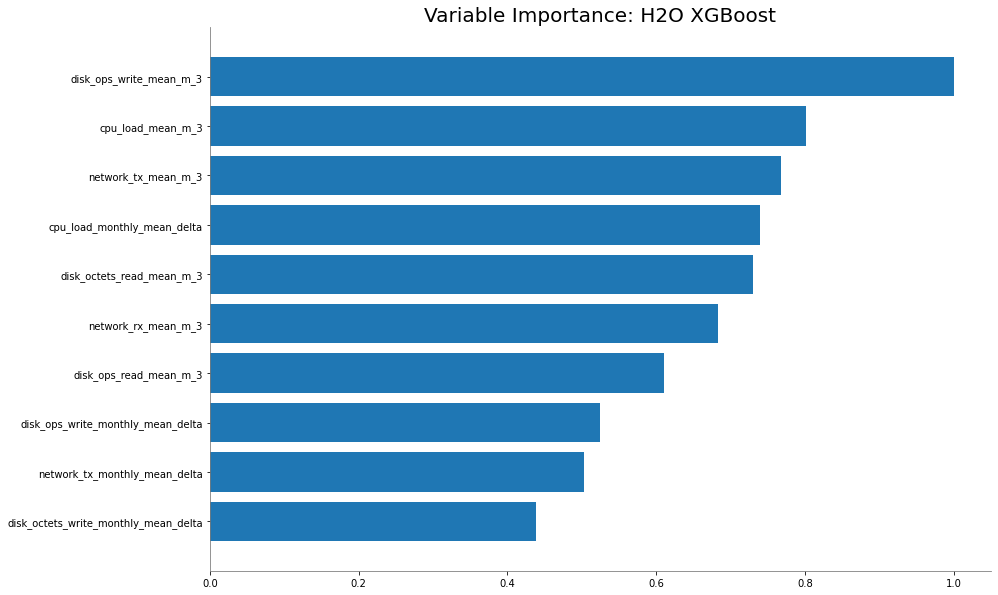

In [58]:
cv_xgb.varimp_plot()

# **AutoML : Automatic Machine Learning:**

In [63]:
from h2o.automl import H2OAutoML

aml = H2OAutoML(max_models = 10, max_runtime_secs=100, seed = 1)
aml.train(x=predictors, y=response, training_frame=train, validation_frame=valid)

AutoML progress: |
14:03:55.416: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

████████████
14:04:13.504: Skipping training of model GBM_5_AutoML_20210914_140355 due to exception: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_5_AutoML_20210914_140355.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 174.0.


████████████████████████████████████████████| 100%


In [64]:
lb = aml.leaderboard
lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_2_AutoML_20210914_140355,0.568418,0.701258,0.514259,0.494681,0.502141,0.252146
XGBoost_3_AutoML_20210914_140355,0.549867,0.837655,0.519467,0.5,0.5435,0.295392
XGBoost_1_AutoML_20210914_140355,0.547739,0.765157,0.493126,0.490293,0.522951,0.273477
GBM_1_AutoML_20210914_140355,0.528191,0.846681,0.468837,0.5,0.544571,0.296558
DeepLearning_1_AutoML_20210914_140355,0.526197,0.811806,0.509842,0.5,0.527164,0.277902
GBM_3_AutoML_20210914_140355,0.519282,0.782169,0.480861,0.5,0.531433,0.282421
DRF_1_AutoML_20210914_140355,0.516423,0.757188,0.478296,0.5,0.521684,0.272154
GBM_4_AutoML_20210914_140355,0.507447,0.794519,0.46289,0.5,0.535051,0.286279
GBM_2_AutoML_20210914_140355,0.502394,0.80066,0.472872,0.5,0.536539,0.287874
StackedEnsemble_AllModels_AutoML_20210914_140355,0.45359,0.692339,0.439553,0.5,0.499587,0.249587


In [67]:
# Error - not enough rows
#metalearner = h2o.get_model(aml.leader.metalearner()['name'])
#metalearner.std_coef_plot()

# **Deep Learning**

In [66]:
from h2o.estimators import H2ODeepLearningEstimator

dl = H2ODeepLearningEstimator(#distribution="tweedie",
                               hidden=[1],
                               epochs=1000,
                               train_samples_per_iteration=-1,
                               reproducible=True,
                               activation="Tanh",
                               single_node_mode=False,
                               balance_classes=False,
                               force_load_balance=False,
                               seed=23123,
                               #tweedie_power=1.5,
                               score_training_samples=0,
                               score_validation_samples=0,
                               stopping_rounds=0)
dl.train(x = predictors, y = response, training_frame = train)
dl.model_performance(valid).auc()


deeplearning Model Build progress: |██████████████████████████████████████| 100%


0.5590909090909091

# Predictions


In [73]:
pred = dl.predict(test)
pred

deeplearning prediction progress: |███████████████████████████████████████| 100%


predict,p0,p1
0,0.713699,0.286301
0,0.601627,0.398373
1,0.0740034,0.925997
0,0.718763,0.281237
0,0.734781,0.265219
0,0.597613,0.402387
1,0.452983,0.547017
0,0.59465,0.40535
0,0.73639,0.26361
1,0.0740034,0.925997


In [75]:
test['is_churn'] = pred['predict']
test

id,cpu_load_mean_m_3,disk_octets_read_mean_m_3,disk_octets_write_mean_m_3,disk_ops_read_mean_m_3,disk_ops_write_mean_m_3,network_rx_mean_m_3,network_tx_mean_m_3,cpu_load_monthly_mean_delta,network_tx_monthly_mean_delta,network_rx_monthly_mean_delta,disk_ops_read_monthly_mean_delta,disk_ops_write_monthly_mean_delta,disk_octets_write_monthly_mean_delta,disk_octets_read_monthly_mean_delta,cpu_load_max_gradient,disk_octets_read_max_gradient,disk_octets_write_max_gradient,disk_ops_read_max_gradient,disk_ops_write_max_gradient,network_rx_max_gradient,network_tx_max_gradient,is_churn
0,18.0591,0.895008,1.15193,26.3143,25.857,0.163445,0.328069,-16.3371,-0.53136,-7.49356,-72.24,-29.3707,-1.34989,-1.30122,-0.567616,-0.0468699,-0.0457663,-2.46792,-1.1879,-0.276125,-0.0185145,0
1,24.9346,2.35209,1.38619,276.629,37.8171,0.217314,0.232033,2.57774,-0.112698,-0.226851,-6.37985,-3.08568,0.0106285,-0.0448746,0.0810932,0.00681607,0.00127506,0.894687,-0.0297023,-0.00903866,-0.00373556,0
2,29.7462,0.8861,3.20822,120.439,54.4847,0.472452,0.953115,-4.36593,0.173835,0.206936,79.3417,16.0234,-13.4826,0.569556,-0.0944682,0.0198634,-0.34635,3.00378,0.830087,0.00320288,0.00253179,1
3,83.0472,1.2533,1.33926,59.1505,17.4188,2.15216,5.33923,1.58998,-0.1109,-0.370504,-35.3092,-2.55907,-0.0630356,-0.518113,0.102411,-0.0167651,0.00266054,-1.15485,-0.037278,-0.0101479,-0.00804048,0
4,26.0127,1.19656,1.3855,26.226,25.6942,4.56134,7.29902,-0.0184785,7.09402,4.38702,8.49702,7.53753,0.450025,0.698036,-0.0137696,0.0213616,0.0135324,0.172553,0.166672,0.128649,0.209524,0
5,75.6013,1.30119,0.391537,130.778,2.26538,0.039899,0.0836502,3.36118,0.00183878,-0.0459956,0.817301,-1.28851,-0.0684874,-0.0188933,0.0661617,-0.0006621,-0.00061861,0.0389494,-0.0143339,-0.00047671,9.01e-05,0
6,4.32398,0.0298783,0.175427,1.56032,1.85548,0.19651,0.658487,0.167756,-0.0115999,0.0418104,0.0763226,0.0810394,0.0369265,0.00148259,0.00367301,6.14e-05,0.00072005,0.00321805,0.0017259,0.00074035,-0.00069289,1
7,30.9758,4.38125,1.19253,123.102,30.0113,0.617733,0.0851834,2.00736,-0.0153129,0.267936,7.56327,7.5064,0.172113,0.977908,0.0916015,0.0283137,0.00471832,0.499916,0.237483,0.0071529,-0.00024775,0
8,22.3338,4.19526,3.20837,1024.23,32.9838,0.642003,0.136323,0.860708,0.0865065,-0.353799,-4.119,-0.430125,-0.0756778,-0.0168714,0.0212623,8.77e-05,-0.0023531,0.0214102,-0.0119187,-0.0142771,0.00044377,0
9,128.458,70.1578,9.78739,3499.85,1904.7,20.4907,0.0414358,71.4435,-0.0200975,5.12127,2439.72,1449.66,2.54919,54.223,2.30667,1.74243,0.132327,76.6624,46.517,0.210108,-0.00019591,1


In [76]:
h2o.export_file(test, path='/tmp/vps_pred_data.txt')

Export File progress: |███████████████████████████████████████████████████| 100%
